In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json

# Positions of RF Center 
The center of the quantum region is axial position = 0

In [2]:
filename = 'rf_center_phoenix.h5'
with h5py.File(filename, 'r') as fh:
    yz_index = np.array(fh['yz_index'])
    yz_um = np.array(fh['yz_um'])
    xs_um = np.array(fh['xs_um'])

Text(0, 0.5, 'Y position (um)')

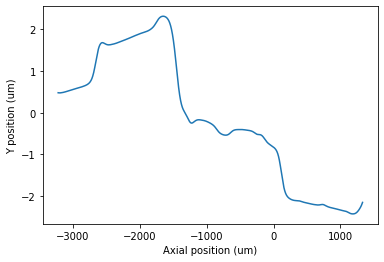

In [3]:
y_um = yz_um[0]
z_um = yz_um[1]
plt.plot(xs_um, y_um)
plt.xlabel('Axial position (um)')
plt.ylabel('Y position (um)')

Text(0, 0.5, 'Z position (um)')

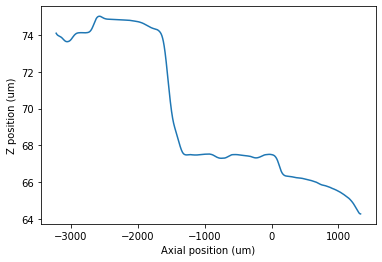

In [4]:
plt.plot(xs_um, z_um)
plt.xlabel('Axial position (um)')
plt.ylabel('Z position (um)')

# Write the solution file

In [7]:
filename = 'compensate_red_20230215/-175.h5'
with h5py.File(filename, 'r') as fh:
    electrode_names = json.loads(np.array(fh['electrode_names']).item())
    electrodes = np.array(fh['electrodes'])
    solutions = {k: np.array(v) for (k, v) in fh['solutions'].items()}

In [8]:
electrodes_used = [electrode_names[i] for i in electrodes]
electrodes_used

[['Q10'],
 ['Q11'],
 ['Q12'],
 ['Q13'],
 ['Q18'],
 ['Q19'],
 ['Q20'],
 ['Q21'],
 ['Q48'],
 ['Q49'],
 ['Q50'],
 ['Q51'],
 ['Q52'],
 ['Q53'],
 ['Q54'],
 ['Q55'],
 ['Q56'],
 ['Q57']]

In [9]:
solutions

{'dx': array([ 3.36429082e-03,  3.36429082e-03, -3.36429009e-03,  5.33097462e-05,
         3.31058238e-04, -2.15834433e-04, -1.91116669e-03,  3.36429021e-03,
         3.36428790e-03, -9.54571612e-04, -3.36429077e-03, -3.36429085e-03,
        -1.16406276e-04,  2.04981391e-04,  3.36429073e-03,  3.36429063e-03,
        -1.32420714e-03, -2.41816996e-03]),
 'dy': array([ 0.00109901, -0.00128598,  0.00128598, -0.00119493,  0.00102749,
        -0.00098546, -0.00128598,  0.0012567 ,  0.00128598, -0.00128598,
         0.00128598, -0.00121846,  0.00128598, -0.00128598, -0.00017536,
         0.00017832, -0.00128598,  0.00125311]),
 'dz': array([ 0.00381217,  0.00381217, -0.00381217,  0.00050641,  0.00044669,
        -0.00058472, -0.00381217,  0.00236078,  0.00381217,  0.00381217,
         0.00381217, -0.00309946, -0.00348237,  0.00186463,  0.00313028,
        -0.00121659,  0.00381217,  0.00381217]),
 'x2': array([-13.38609605, -13.38609605,  13.38609586,  11.03402285,
         -0.04711866,   0.58

In [10]:
f = open("solutions/Phoenix_noQ16Q17.txt", "r")
names = list(f.readline().split("\t"))
values = list(f.readline().split("\t"))
f.close()

In [11]:
res_eg = {names[i]: values[i] for i in range(len(names))}
# Printing resultant dictionary
print("Example dictionary is : " + str(res_eg))

Example dictionary is : {'L0': '0', 'L1': '0', 'L2': '0', 'L3': '0', 'L4': '0', 'L5': '0', 'L6': '0', 'L7': '0', 'L8': '0', 'L9': '0', 'O0': '0', 'O1': '0', 'Q00': '0', 'Q01': '0', 'Q02': '0', 'Q03': '0', 'Q04': '0', 'Q05': '0', 'Q06': '0', 'Q07': '0', 'Q08': '0', 'Q09': '0', 'Q10': '0.07658143888397267', 'Q11': '0.8218001659049519', 'Q12': '0.8218027506098731', 'Q13': '0.8218027527392288', 'Q14': '0.19847500828067466', 'Q15': '-0.0791566626688488', 'Q16': '0', 'Q17': '0', 'Q18': '-0.07834568880533234', 'Q19': '0.2297778611837709', 'Q20': '0.8218027833953311', 'Q21': '0.8218027837262808', 'Q22': '0', 'Q23': '0', 'Q24': '0', 'Q25': '0', 'Q26': '0', 'Q27': '0', 'Q28': '0', 'Q29': '0', 'Q30': '0', 'Q31': '0', 'Q32': '0', 'Q33': '0', 'Q34': '0', 'Q35': '0', 'Q36': '0', 'Q37': '0', 'Q38': '0', 'Q39': '0', 'Q40': '0', 'Q41': '0', 'Q42': '0', 'Q43': '0', 'Q44': '0', 'Q45': '0', 'Q46': '0', 'Q47': '0', 'Q48': '-0.8218027691207956', 'Q49': '-0.8218027691029198', 'Q50': '-0.3838272533191884', 'Q

In [12]:
res = {names[i]: '0' for i in range(len(names))}
for i in range(len(electrodes_used)):
    res[electrodes_used[i][0]] = str(solutions['x2'][i]*0.3**2) # 0.3**2 means this solution will generate 0.3kHz axial frequency
# Printing resultant dictionary
print("Resultant dictionary is : " + str(res))

Resultant dictionary is : {'L0': '0', 'L1': '0', 'L2': '0', 'L3': '0', 'L4': '0', 'L5': '0', 'L6': '0', 'L7': '0', 'L8': '0', 'L9': '0', 'O0': '0', 'O1': '0', 'Q00': '0', 'Q01': '0', 'Q02': '0', 'Q03': '0', 'Q04': '0', 'Q05': '0', 'Q06': '0', 'Q07': '0', 'Q08': '0', 'Q09': '0', 'Q10': '-1.2047486440556086', 'Q11': '-1.2047486440783086', 'Q12': '1.204748627630449', 'Q13': '0.9930620565018535', 'Q14': '0', 'Q15': '0', 'Q16': '0', 'Q17': '0', 'Q18': '-0.004240679828148215', 'Q19': '0.05291147920876888', 'Q20': '1.204748623994201', 'Q21': '0.40527861036641866', 'Q22': '0', 'Q23': '0', 'Q24': '0', 'Q25': '0', 'Q26': '0', 'Q27': '0', 'Q28': '0', 'Q29': '0', 'Q30': '0', 'Q31': '0', 'Q32': '0', 'Q33': '0', 'Q34': '0', 'Q35': '0', 'Q36': '0', 'Q37': '0', 'Q38': '0', 'Q39': '0', 'Q40': '0', 'Q41': '0', 'Q42': '0', 'Q43': '0', 'Q44': '0', 'Q45': '0', 'Q46': '0', 'Q47': '0', 'Q48': '-1.2047486442074844', 'Q49': '-1.2047486442124082', 'Q50': '1.1926183003742614', 'Q51': '1.2047485087694385', 'Q52':

In [282]:
# open file and read the content in a list
with open('solutions/Phoenix_noQ14Q15Q16Q17.txt', 'w') as fp:
    fp.write('\t'.join(res.keys()))
    fp.write('\t'.join(res.values()))

# Write the global adjust file

In [283]:
f = open("solutions/global_adjust_with_trap_solution.txt", "r")
data = f.readlines()
f.close()

In [284]:
overwrite_dict = {'electrode_name': 79, 'dz': 80, 'dy':81, 'dx':82, 'yz':83, 'z2':84, 'x2':85}
scale = {'dz': 1000, 'dy':1000, 'dx':1000, 'yz':1, 'z2':1, 'x2':1}
names_adjust = list(data[overwrite_dict['electrode_name']].split("\t"))
def overwrite_coeff(data, item, idx, scale):
    res = {names_adjust[i]: '0' for i in range(len(names_adjust))}
    if item != 'electrode_name':
        for i in range(len(electrodes_used)):
            res[electrodes_used[i][0]] = str(solutions[item][i]*scale[item])
        data[idx] = '\t'.join(res.values())
        data[idx] = data[idx]+'\n'

In [285]:
for key in overwrite_dict.keys():
    overwrite_coeff(data, key, overwrite_dict[key], scale)

In [286]:
with open('solutions/global_adjust_noQ14Q15Q16Q17.txt', 'w') as fp:
    fp.writelines(data)